In [ ]:
!nvidia-smi -L

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/userrev(scrapped).csv", encoding='latin-1') #raw user data path

In [ ]:
df['text'] = df['review_title'].astype(str) + ' ' + df['review_content'].astype(str)

In [ ]:
df

In [ ]:
#unique rating of user data
df['review_rating'].unique()

In [ ]:
# find null values in df and delete

df.isnull().sum()
df = df.dropna()


In [ ]:
#print index of df ['review rating'] where value is ' '

import pandas as pd

# Get the index of rows where 'review_rating' is empty
empty_review_rating_indices = df[df['review_rating'] == ' '].index

# Print the indices
print(empty_review_rating_indices)


In [ ]:
# prompt: print unique values of df['review rating']

print(df['review_rating'].unique())


In [ ]:
# replace review_rating in df to positive if valueis 5 and 4

df['review_rating'] = df['review_rating'].replace(5, 'positive')
df['review_rating'] = df['review_rating'].replace(4, 'positive')
df['review_rating'] = df['review_rating'].replace(2, 'negative')
df['review_rating'] = df['review_rating'].replace(1, 'negative')

In [ ]:
# handling review with rating 3

#df[df['review_rating'] == 3]
for index,line in df.iterrows():

   if line['review_rating']:
    if line['review_likes']>line['review_dislikes']:
      df['review_rating'] = df['review_rating'].replace(3, 'positive')
    elif line['review_likes']<line['review_dislikes']:
      df['review_rating'] = df['review_rating'].replace(3, 'negative')
    else:
      df['review_rating'] = df['review_rating'].replace(3, 'positive')

In [ ]:
df['review_rating'].value_counts()

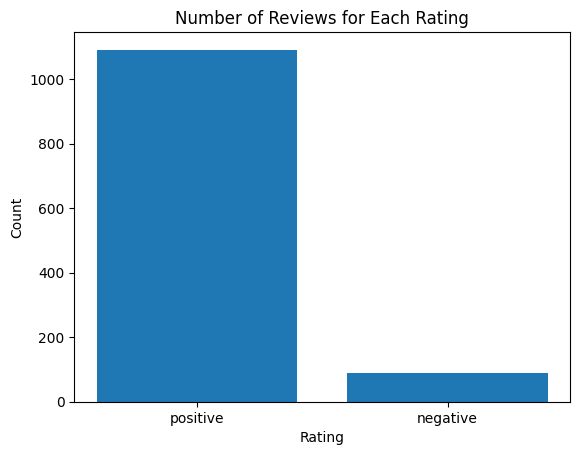

In [ ]:
# prompt: plot a graph based on unique values of rating

import matplotlib.pyplot as plt

# Get the number of occurrences for each unique rating
rating_counts = df['review_rating'].value_counts()

# Create a bar chart
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Number of Reviews for Each Rating")
plt.show()


In [ ]:
df['review_dislikes'].value_counts()

In [ ]:
df['review_likes'].value_counts()

In [ ]:
df['review_rating'][24]

In [ ]:
df.isnull().sum()

In [ ]:
df1.isnull().sum()

#Data Cleaning

In [ ]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
import re

In [ ]:

def clean_text(text):

  text = text.lower()
  # Tokenize the text (split into words)
  text = re.sub(r'\.{2,}', '.', text)
  tokens = nltk.word_tokenize(text)

  # Remove stop words
  stop_words = stopwords.words('english')
  tokens = [word for word in tokens if word not in stop_words]

  # Remove numbers
  tokens = [word for word in tokens if not word.isdigit()]

  # Remove punctuation
  tokens = [word for word in tokens if word not in punctuation]

  # Remove POS tags (if needed)
  # Uncomment the following lines if you want to remove POS tags (requires NLTK pos_tag)
  # nltk.download('averaged_perceptron_tagger')
  # pos_tagged_tokens = nltk.pos_tag(tokens)
  # tokens = [word for word, pos in pos_tagged_tokens if pos not in ['NN', 'VB', 'JJ', 'RB', ...]]  # Add relevant POS tags to remove

  # Return the cleaned list of words
  return tokens

def clean_dataset(data, text_column_name):

  # Apply clean_text function to the text column and store in a new column
  data["cleaned_text"] = data[text_column_name].apply(clean_text)

  # Return the DataFrame with the new cleaned text column
  return data

# Assuming your dataset is loaded into a pandas DataFrame called "df"
cleaned_df = clean_dataset(df.copy(), "text")  # Replace "text_column_name" with your actual column name

# Now you have the cleaned dataset in "cleaned_df"
print(cleaned_df)


In [ ]:
replacements = {'Positive': 4, 'Negative': 1, 'Negative': 2,'Positive': 5, 'Positive': 3,}

In [ ]:
# prompt: show all data with df1['rating'] is 3

df[df['review_rating'] == 3]


In [ ]:
cleaned_df

In [ ]:
df1=pd.DataFrame()
df1['product_id']=df['product_id']
df1['product_url']=df['product_url']
df1['text']=cleaned_df['text']
df1['cleaned_text']=cleaned_df['cleaned_text']
df1['review_date']=df['review_date']

In [ ]:
df1.isnull().sum()

In [ ]:
df1=clean_dataset(df1, "text")

In [ ]:
df

In [ ]:

def clean_text(text):


  # Convert text to lowercase
  text = text.lower()

  # Remove repeated periods using regular expressions
  text = re.sub(r'\.{2,}', '.', text)  # Replace two or more consecutive periods with a single period

  # Tokenize the text (split into words)
  tokens = nltk.word_tokenize(text)

  # ... (rest of the cleaning process remains the same)

# ... (rest of the code for clean_dataset function and usage remains the same)


In [ ]:
df1[df1['text'] == 'nan nan']#displaying  nan values

,product_id,product_url,text,cleaned_text,review_date


In [ ]:
# checking for string 'nan nan' value in df1 in text and drop

df1 = df1[df1['text'] != 'nan nan']


In [ ]:
df1

In [ ]:
# reset index of df1

df1.reset_index(drop=True, inplace=True)


In [ ]:
df1

In [ ]:
#download the df1 as csv

df1.to_csv('techfinaldoc.csv', index=False)
